In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
def p2f(x):
    return float(x.strip('%'))/100

In [113]:
df_future=pd.read_csv('E:/Education/Future50-restaurant.csv',converters={'YOY_Sales':p2f, 'YOY_Units':p2f})
df_top250=pd.read_csv('E:/Education/Top250-rest.csv',converters={'YOY_Sales':p2f, 'YOY_Units':p2f})
df_independence=pd.read_csv('E:/Education/Independence100-rest.csv')

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [115]:
import plotly.express as px

In [116]:
df_future.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,1.305,26,1.167,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,1.219,105,0.944,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,0.810,21,0.909,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,0.797,46,0.586,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,0.771,50,0.563,1210,Yes


In [117]:
df_top250.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,0.049,13846,-0.005,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,0.086,15049,0.030,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,0.130,2470,0.050,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,0.090,6766,0.027,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,0.027,7346,0.002,NaN,Quick Service & Burger


In [118]:
df_independence.head()

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0


In [119]:
#checking null
df_top250.isnull().mean()*100

Rank                 0.0
Restaurant           0.0
Content             86.8
Sales                0.0
YOY_Sales            0.0
Units                0.0
YOY_Units            0.0
Headquarters        79.2
Segment_Category     0.0
dtype: float64

In [120]:
df_top250.drop(['Content', 'Headquarters'], axis = 1, inplace = True)
df_top250.shape

(250, 7)

In [121]:
df_future.isnull().mean()*100

Rank           0.0
Restaurant     0.0
Location       0.0
Sales          0.0
YOY_Sales      0.0
Units          0.0
YOY_Units      0.0
Unit_Volume    0.0
Franchising    0.0
dtype: float64

In [122]:
df_independence.isnull().mean()*100

Rank             0.0
Restaurant       0.0
Sales            0.0
Average Check    0.0
City             0.0
State            0.0
Meals Served     0.0
dtype: float64

In [123]:
df_top250.rename(columns={'Units':'Branches','Segment_Category':'sub_category'},inplace=True)

Checking for any independence restaurant in top 250

In [124]:
rest_ind = list(df_independence['Restaurant'].values)
df_top250['ind_100']=df_top250['Restaurant'].apply(lambda x:1 if x in rest_ind else 0 )
df_top250['ind_100'].value_counts()

0    250
Name: ind_100, dtype: int64

df_top250['YOY_Sales']=df_top250['YOY_Sales'].apply(lambda x:x.replace('%',''))
df_top250['YOY_Units']=df_top250['YOY_Units'].apply(lambda x:x.replace('%',''))
#====
df_top250['YOY_Sales']= pd.to_numeric(df_top250['YOY_Sales'])
df_top250['YOY_Units']=pd.to_numeric(df_top250['YOY_Units'])

In [126]:
df_top250

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,sub_category,ind_100
0,1,McDonald's,40412,0.049,13846,-0.005,Quick Service & Burger,0
1,2,Starbucks,21380,0.086,15049,0.030,Quick Service & Coffee Cafe,0
2,3,Chick-fil-A,11320,0.130,2470,0.050,Quick Service & Chicken,0
3,4,Taco Bell,11293,0.090,6766,0.027,Quick Service & Mexican,0
4,5,Burger King,10204,0.027,7346,0.002,Quick Service & Burger,0
...,...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,129,-0.104,18,-0.053,Varied Menu,0
246,247,PDQ,127,-0.055,56,-0.111,Chicken,0
247,248,Lupe Tortilla,127,0.121,25,0.087,Mexican,0
248,249,Cook-Out Restaurant,126,0.101,270,0.071,Burger,0


In [127]:
df_top250.describe()

,Rank,Sales,YOY_Sales,Branches,YOY_Units,ind_100
count,250.000000,250.00000,250.000000,250.000000,250.000000,250.0
mean,125.500000,1242.74000,0.029384,850.076000,0.012192,0.0
std,72.312977,3365.22882,0.089538,2296.151659,0.079364,0.0
min,1.000000,126.00000,-0.212000,13.000000,-0.328000,0.0
25%,63.250000,181.00000,-0.023750,85.000000,-0.020250,0.0
50%,125.500000,330.00000,0.022000,207.000000,0.000000,0.0
75%,187.750000,724.75000,0.065750,555.250000,0.034750,0.0
max,250.000000,40412.00000,0.395000,23801.000000,0.385000,0.0


Manipulate with YOY values

In [128]:
df_top250['Sales_year']=df_top250['YOY_Sales'].apply(lambda x:'positive' if x>0 else 'negative')
df_top250['unit_stat']=df_top250['YOY_Units'].apply(lambda x:'positive' if x>0 else 'negative')

In [129]:
df_top250

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,sub_category,ind_100,Sales_year,unit_stat
0,1,McDonald's,40412,0.049,13846,-0.005,Quick Service & Burger,0,positive,negative
1,2,Starbucks,21380,0.086,15049,0.030,Quick Service & Coffee Cafe,0,positive,positive
2,3,Chick-fil-A,11320,0.130,2470,0.050,Quick Service & Chicken,0,positive,positive
3,4,Taco Bell,11293,0.090,6766,0.027,Quick Service & Mexican,0,positive,positive
4,5,Burger King,10204,0.027,7346,0.002,Quick Service & Burger,0,positive,positive
...,...,...,...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,129,-0.104,18,-0.053,Varied Menu,0,negative,negative
246,247,PDQ,127,-0.055,56,-0.111,Chicken,0,negative,negative
247,248,Lupe Tortilla,127,0.121,25,0.087,Mexican,0,positive,positive
248,249,Cook-Out Restaurant,126,0.101,270,0.071,Burger,0,positive,positive


In [130]:
df = df_top250.groupby('sub_category').count()
df

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,ind_100,Sales_year,unit_stat
sub_category,,,,,,,,,
Asian,3,3,3,3,3,3,3,3,3
Asian/Noodle,3,3,3,3,3,3,3,3,3
BBQ,7,7,7,7,7,7,7,7,7
Bakery Cafe,8,8,8,8,8,8,8,8,8
Burger,10,10,10,10,10,10,10,10,10
Casual Dining & Asian,1,1,1,1,1,1,1,1,1
Casual Dining & Italian/Pizza,4,4,4,4,4,4,4,4,4
Casual Dining & Seafood,2,2,2,2,2,2,2,2,2
Casual Dining & Sports Bar,3,3,3,3,3,3,3,3,3


In [131]:
df_top250['sub_category'].unique()

array(['Quick Service & Burger', 'Quick Service & Coffee Cafe',
       'Quick Service & Chicken', 'Quick Service & Mexican',
       'Quick Service & Sandwich', 'Quick Service & Pizza',
       'Fast Casual & Bakery Cafe', 'Fast Casual & Mexican',
       'Casual Dining & Italian/Pizza', 'Casual Dining & Varied Menu',
       'Fast Casual & Asian/Noodle', 'Quick Service & Frozen Desserts',
       'Casual Dining & Sports Bar', 'Family Dining & Family Style',
       'Casual Dining & Steak', 'Casual Dining & Seafood',
       'Fast Casual & Sandwich', 'Fast Casual & Chicken',
       'Quick Service & Family Casual', 'Fast Casual & Burger',
       'Casual Dining & Asian', 'Quick Service & Snack', 'Steak',
       'Quick Service & Beverage', 'Sports Bar',
       'Quick Service & Seafood', 'Quick Service & Bakery Cafe',
       'Fast Casual & Pizza', 'Fine Dining & Steak', 'Mexican',
       'Varied Menu', 'Chicken', 'Italian/Pizza', 'Pizza', 'Seafood',
       'Frozen Desserts', 'Coffee Cafe', 'BBQ',

In [132]:
def replace(text):
    if 'Quick Service & ' in text:
        text = text.replace('Quick Service & ', '')  
    elif 'Fast' in text:
        text = text.replace('Fast Casual & ', '')
    elif 'Casual' in text:
        text = text.replace('Casual Dining & ', '')
    elif 'Fine Dining & ' in text:
        text = text.replace('Fine Dining & ', '')
    elif 'Family Dining & ' in text:
        text = text.replace('Family Dining & ', '')
    elif 'Family Style' in text:
        text = text.replace('Family Style', 'Family')
    elif 'Family Casual' in text:
        text = text.replace('Family Casual', 'Family')
    elif 'Asian/Noodle' in text:
        text = text.replace('Asian/Noodle', 'Asian')
    elif 'Italian/Pizza' in text:
        text = text.replace('Italian/Pizza', 'Pizza')
    else:
        text = text
    return text

In [133]:
df_top250['sub_category'] = df_top250['sub_category'].apply(replace)
df_top250['sub_category'] = df_top250['sub_category'].str.replace('Family Style', 'Family')
df_top250['sub_category'] = df_top250['sub_category'].str.replace('Asian/Noodle', 'Asian')
df_top250['sub_category'] = df_top250['sub_category'].str.replace('Family Casual', 'Family')
df_top250['sub_category'] = df_top250['sub_category'].str.replace('Italian/Pizza', 'Pizza')



df_top250['sub_category'].unique()

array(['Burger', 'Coffee Cafe', 'Chicken', 'Mexican', 'Sandwich', 'Pizza',
       'Bakery Cafe', 'Varied Menu', 'Asian', 'Frozen Desserts',
       'Sports Bar', 'Family', 'Steak', 'Seafood', 'Snack', 'Beverage',
       'BBQ', 'Healthy', 'Ethnic'], dtype=object)

In [134]:
df_top250

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,sub_category,ind_100,Sales_year,unit_stat
0,1,McDonald's,40412,0.049,13846,-0.005,Burger,0,positive,negative
1,2,Starbucks,21380,0.086,15049,0.030,Coffee Cafe,0,positive,positive
2,3,Chick-fil-A,11320,0.130,2470,0.050,Chicken,0,positive,positive
3,4,Taco Bell,11293,0.090,6766,0.027,Mexican,0,positive,positive
4,5,Burger King,10204,0.027,7346,0.002,Burger,0,positive,positive
...,...,...,...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,129,-0.104,18,-0.053,Varied Menu,0,negative,negative
246,247,PDQ,127,-0.055,56,-0.111,Chicken,0,negative,negative
247,248,Lupe Tortilla,127,0.121,25,0.087,Mexican,0,positive,positive
248,249,Cook-Out Restaurant,126,0.101,270,0.071,Burger,0,positive,positive


In [135]:
df_top250['category']=df_top250['sub_category'].apply(lambda x:x.replace('Quick Service & Burger','Burger').replace(
                                                      'Italian/Pizza','Pizza').replace('Quick Service & Pizza','Pizza').replace(
'Bakery Cafe ','Cafe').replace('Coffee Cafe','Cafe')).replace(
    'Quick Service & Chicken','Chicken').replace('Casual Dining & Pizza','Pizza').replace(
'Quick Service & Cafe','Cafe').replace('Fast Casual & Pizza','Pizza').replace(
    'Fast Casual & Bakery Cafe','Cafe').replace('Quick Service & Frozen Desserts','Dessert').replace(
'Quick Service & Family Casual','Family').replace('Casual Dining & Asian','Asian').replace(
    'Asian/Noodle','Asian').replace('Casual Dining & Seafood','Seafood').replace(
'Bakery Cafe','Cafe').replace('Frozen Desserts','Dessert').replace(
    'Family Dining & Family Style','Family').replace('Fast Casual & Sandwich','Sandwich').replace(
'Family Casual','Family').replace('Fast Casual & Chicken','Chicken').replace(
    'Fast Casual & Burger','Burger').replace('Casual Dining & Steak','Steak').replace(
'Casual Dining & Sports Bar','Sports Bar').replace('Quick Service & Mexican','Mexican').replace(
    'Quick Service & Mexican','Mexican').replace(
'Quick Service & Seafood','Seafood').replace('Quick Service & Sandwich','Sandwich').replace(
    'Seafodd','Seafood').replace('Fine Dining & Steak','Steak').replace(
'Quick Service & Bakery Cafe','Cafe').replace('Fast Casual & Asian/Noodle','Asia').replace(
    'Quick Service & Snack','Snack').replace(
'Fast Casual & Mexican','Mexican').replace('Quick Service & Beverage','Drinks').replace(
    'Asian','Asia').replace('Sports Bar','Sports Bar').replace(
'Casual Dining & Varied Menu','Varied Menu').replace('Steak','Meat').replace('BBQ','Meat').replace('Family Style','Family')

In [136]:
df_top250.head()

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,sub_category,ind_100,Sales_year,unit_stat,category
0,1,McDonald's,40412,0.049,13846,-0.005,Burger,0,positive,negative,Burger
1,2,Starbucks,21380,0.086,15049,0.030,Coffee Cafe,0,positive,positive,Cafe
2,3,Chick-fil-A,11320,0.130,2470,0.050,Chicken,0,positive,positive,Chicken
3,4,Taco Bell,11293,0.090,6766,0.027,Mexican,0,positive,positive,Mexican
4,5,Burger King,10204,0.027,7346,0.002,Burger,0,positive,positive,Burger


In [137]:
mysales = df_top250.groupby(['sub_category'])['Sales' ].sum().sort_values( ) 
 
mysales = pd.DataFrame(mysales, columns= ['Sales' ])
mysales.head()

,Sales
sub_category,
Ethnic,149
Healthy,184
BBQ,1472
Beverage,1552
Snack,2098


# EDA 


In [138]:
#correlation with sales

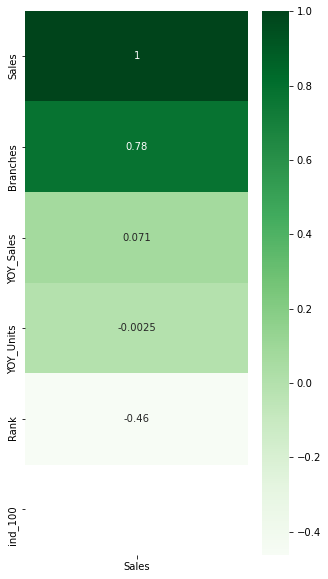

In [139]:
corr = df_top250.corr().loc[:,['Sales']]

fig, ax = plt.subplots(figsize=(5,10))

ax = sns.heatmap(corr.sort_values(by=['Sales'],ascending=False), ax=ax,annot=True,cbar=True,cmap="Greens")
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

plt.show()

In [140]:
df_top250.corr()

,Rank,Sales,YOY_Sales,Branches,YOY_Units,ind_100
Rank,1.000000,-0.462349,-0.057236,-0.450929,-0.014441,NaN
Sales,-0.462349,1.000000,0.071308,0.780101,-0.002509,NaN
YOY_Sales,-0.057236,0.071308,1.000000,0.024248,0.883273,NaN
Branches,-0.450929,0.780101,0.024248,1.000000,-0.034148,NaN
YOY_Units,-0.014441,-0.002509,0.883273,-0.034148,1.000000,NaN
ind_100,NaN,NaN,NaN,NaN,NaN,NaN


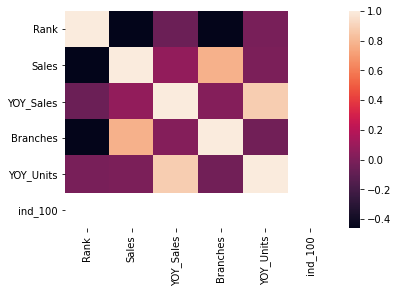

In [141]:
sns.heatmap(df_top250.corr())

In [142]:
plt.figure(figsize=(14,7));
Platform = df_top250['Sales_year'].value_counts(sort = True).index
Count = df_top250['Sales_year'].value_counts(sort = True)
#====
fig = px.pie(names = Platform,
             values = Count,
             title='Positive - Negative')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<Figure size 1008x504 with 0 Axes>

In [143]:
#top resturants in best category

#pizza

pizza = df_top250.query("category == 'Pizza'")[:10]

fig = px.bar(pizza,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Viridis',
             title='Pizza Sales Top Restaurants')
fig.show()


In [144]:
Burger = df_top250.query("category == 'Burger'")[:10]

fig = px.bar(Burger,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='BlackBody',
             title='Burger Top Restaurants')
fig.show()

In [145]:
VariedMenu = df_top250.query("category == 'Varied Menu'")[:10]

fig = px.bar(VariedMenu,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Plotly3',
             title='VariedMenu Top Restaurants')
fig.show()

In [146]:
Meat = df_top250.query("category == 'Meat'")[:10]

fig = px.bar(Meat,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Jet',
             title='Meat Top Restaurants')
fig.show()

In [147]:
Mexican = df_top250.query("category == 'Mexican'")[:10]

fig = px.bar(Mexican,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Aggrnyl',
             title='Mexican Top Restaurants')
fig.show()

In [148]:
#future data

In [149]:
df_future['Location'] = df_future.Location.apply(lambda x: x.split(', '))
df_future['State'] = df_future.Location.str.slice(1,9).sum()
df_future['City'] = df_future.Location.str.slice(0,1).sum()
df_future['State'] = df_future.State.apply(lambda x: x.replace(" ", ""))
df_future['City'] = df_future.City.apply(lambda x: x.replace(" ", ""))
df_future.drop('Location', axis=1, inplace=True)

In [150]:
df_future.head()

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,State,City
0,1,Evergreens,24,1.305,26,1.167,1150,No,Wash.,Seattle
1,2,Clean Juice,44,1.219,105,0.944,560,Yes,N.C.,Charlotte
2,3,Slapfish,21,0.810,21,0.909,1370,Yes,Calif.,HuntingtonBeach
3,4,Clean Eatz,25,0.797,46,0.586,685,Yes,N.C.,Wilmington
4,5,Pokeworks,49,0.771,50,0.563,1210,Yes,Calif.,Irvine


In [151]:
Platform = df_future['Franchising'].value_counts(sort = True).index
Count = df_future['Franchising'].value_counts(sort = True)
#====
fig = px.pie(names = Platform,
             values = Count,
             title='Franchising Or Not')
fig.update_traces(textposition='inside', textinfo='percent+label')

In [154]:
franch = df_future.groupby('Franchising',as_index=False).agg({'YOY_Sales':'sum'})
fig = px.bar(franch,
             x='Franchising',
             y='YOY_Sales',
             color='YOY_Sales',
             color_continuous_scale='thermal',
             title='Franchising Or not')
fig.show()

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

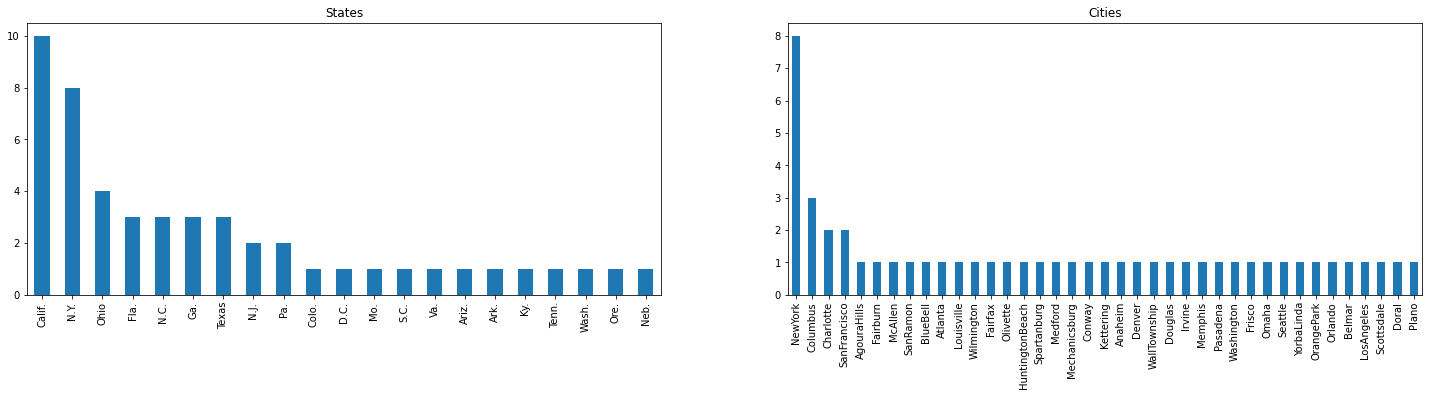

In [156]:
plt.subplots(figsize=(25,5))

plt.subplot(1,2,2)
df_future['City'].value_counts().plot(kind='bar').set_title('Cities')

plt.subplot(1,2,1)
df_future['State'].value_counts().plot(kind='bar').set_title('States')

plt.show()

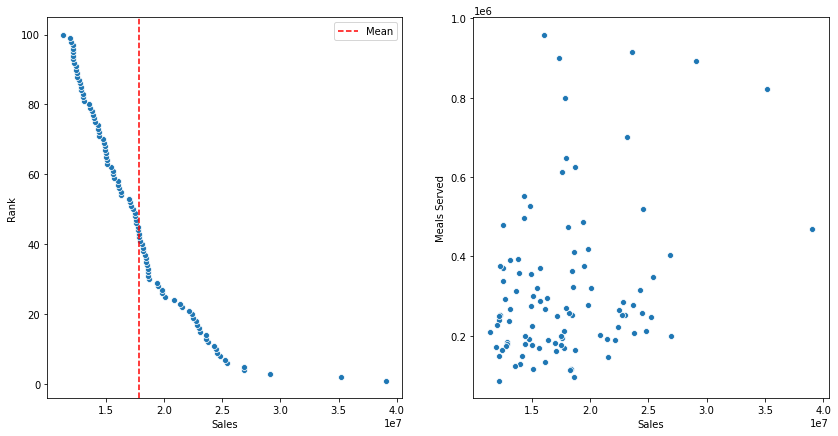

In [157]:
plt.subplots(figsize=(14,7))

plt.subplot(1,2,1)
sns.scatterplot(x=df_independence.Sales, y=df_independence.Rank)
plt.axvline(df_independence.Sales.mean(), ls='--', color='red', label='Mean')
plt.legend()

plt.subplot(1,2,2)
sns.scatterplot(x=df_independence.Sales, y=df_independence['Meals Served'])

plt.show()

In [158]:
x = df_independence.drop(['Restaurant','Sales','City','State'], axis=1)
y = df_independence['Sales']

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [160]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [161]:
predicao = forest.predict(x_test)

In [162]:
print('MAE:', mean_absolute_error(y_test, predicao))
print('MSE:', mean_squared_error(y_test, predicao))
print("R²:", r2_score(y_test, predicao))

MAE: 651277.9335
MSE: 2034556782746.6438
R²: 0.9140062172910846


In [163]:
print('True values:', y_test.mean())
print("Prediction values:", predicao.mean())
print('Mean difference:', y_test.mean() - predicao.mean())

True values: 18188443.35
Prediction values: 18796054.343500003
Mean difference: -607610.9935000017


In [164]:
df_top250

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,sub_category,ind_100,Sales_year,unit_stat,category
0,1,McDonald's,40412,0.049,13846,-0.005,Burger,0,positive,negative,Burger
1,2,Starbucks,21380,0.086,15049,0.030,Coffee Cafe,0,positive,positive,Cafe
2,3,Chick-fil-A,11320,0.130,2470,0.050,Chicken,0,positive,positive,Chicken
3,4,Taco Bell,11293,0.090,6766,0.027,Mexican,0,positive,positive,Mexican
4,5,Burger King,10204,0.027,7346,0.002,Burger,0,positive,positive,Burger
...,...,...,...,...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,129,-0.104,18,-0.053,Varied Menu,0,negative,negative,Varied Menu
246,247,PDQ,127,-0.055,56,-0.111,Chicken,0,negative,negative,Chicken
247,248,Lupe Tortilla,127,0.121,25,0.087,Mexican,0,positive,positive,Mexican
248,249,Cook-Out Restaurant,126,0.101,270,0.071,Burger,0,positive,positive,Burger


In [165]:
df_top250_num=df_top250.select_dtypes(exclude='object')
df_top250_cat=df_top250.select_dtypes(include='object')

In [166]:
df_top250_cat

,Restaurant,sub_category,Sales_year,unit_stat,category
0,McDonald's,Burger,positive,negative,Burger
1,Starbucks,Coffee Cafe,positive,positive,Cafe
2,Chick-fil-A,Chicken,positive,positive,Chicken
3,Taco Bell,Mexican,positive,positive,Mexican
4,Burger King,Burger,positive,positive,Burger
...,...,...,...,...,...
245,Rainforest Cafe,Varied Menu,negative,negative,Varied Menu
246,PDQ,Chicken,negative,negative,Chicken
247,Lupe Tortilla,Mexican,positive,positive,Mexican
248,Cook-Out Restaurant,Burger,positive,positive,Burger


In [167]:
df_top250_cat=pd.get_dummies(df_top250_cat)

In [168]:
df_top250_cat

,Restaurant_54th Street Restaurant & Drafthouse,Restaurant_A&W All-American Food,Restaurant_Anthony's Coal Fired Pizza,Restaurant_Applebee's,Restaurant_Arby's,Restaurant_Au Bon Pain,Restaurant_Auntie Anne's,Restaurant_BJ's Restaurant & Brewhouse,Restaurant_Bahama Breeze Island Grille,Restaurant_Bar Louie,...,category_Family,category_Healthy,category_Meat,category_Mexican,category_Pizza,category_Sandwich,category_Seafood,category_Snack,category_Sports Bar,category_Varied Menu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


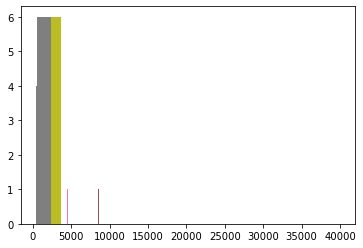

In [169]:
plt.hist(df_top250_num)
plt.show()

In [170]:
df_top250_final=pd.concat((df_top250_cat,df_top250_num),axis=1)

In [171]:
from sklearn.ensemble import RandomForestRegressor

In [172]:
x = df_top250_final.drop('Sales', axis=1)

y = df_top250_final['Sales']

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [174]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [175]:
predicao2 = forest.predict(x_test)

In [176]:
print("MSE:", mean_squared_error(y_test, predicao2))
print("MAE:", mean_absolute_error(y_test, predicao2))
print("R²:", r2_score(y_test, predicao2))

MSE: 1159752.4155099995
MAE: 206.59099999999998
R²: 0.6421660942159293


In [177]:
print('True value:', y_test.mean())
print('Prediction:', predicao2.mean())

True value: 884.44
Prediction: 1090.2377999999999


In [178]:
import xgboost as xgb

In [179]:
data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)

xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10)

xgb_reg.fit(x_train,y_train)

y_hat_xgb = xgb_reg.predict(x_test)

In [180]:
mean_absolute_error(y_test, y_hat_xgb)

422.27852142333984

In [181]:
#future


In [182]:
df_future=df_future.drop('Rank',axis=1)

In [183]:
df_future.head()

,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,State,City
0,Evergreens,24,1.305,26,1.167,1150,No,Wash.,Seattle
1,Clean Juice,44,1.219,105,0.944,560,Yes,N.C.,Charlotte
2,Slapfish,21,0.810,21,0.909,1370,Yes,Calif.,HuntingtonBeach
3,Clean Eatz,25,0.797,46,0.586,685,Yes,N.C.,Wilmington
4,Pokeworks,49,0.771,50,0.563,1210,Yes,Calif.,Irvine


In [185]:
def f(x):
    if x=='No':
        return 0
    else:
        return 1

In [186]:
df_future['Franchising']=df_future['Franchising'].apply(f)

In [202]:
df_future_cat=df_future.select_dtypes(include='object')
df_future_num=df_future.select_dtypes(exclude='object')

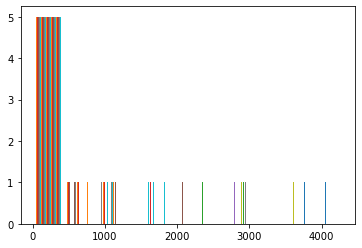

In [203]:
plt.hist(df_future_num)
plt.show()

In [204]:
df_future_num.head()

,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,24,1.305,26,1.167,1150,0
1,44,1.219,105,0.944,560,1
2,21,0.810,21,0.909,1370,1
3,25,0.797,46,0.586,685,1
4,49,0.771,50,0.563,1210,1


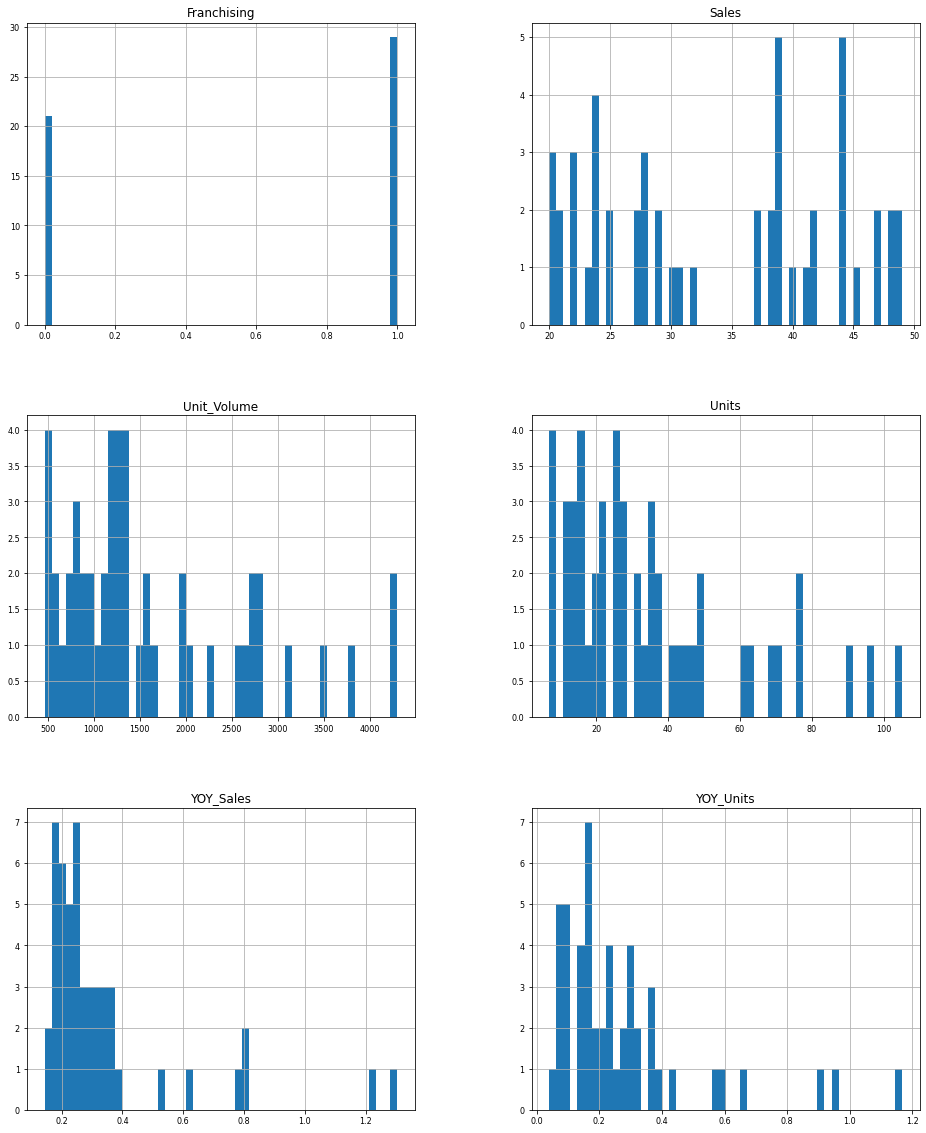

In [205]:
df_future_num.hist(figsize=(16, 20), 
              bins=50, xlabelsize=8, ylabelsize=8);

In [206]:
from scipy.stats import skew
data_num_skew = df_future_num.apply(lambda x: skew(x.dropna()))
data_num_skew = data_num_skew[data_num_skew > .75]

# apply log + 1 transformation for all numeric features with skewnes over .75
df_future_num[data_num_skew.index] = np.log1p(df_future_num[data_num_skew.index])

C:\Users\Welcome\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [207]:
# List of variables has skewness more than 0.75
data_num_skew

YOY_Sales      2.566480
Units          1.178512
YOY_Units      2.114007
Unit_Volume    1.178637
dtype: float64

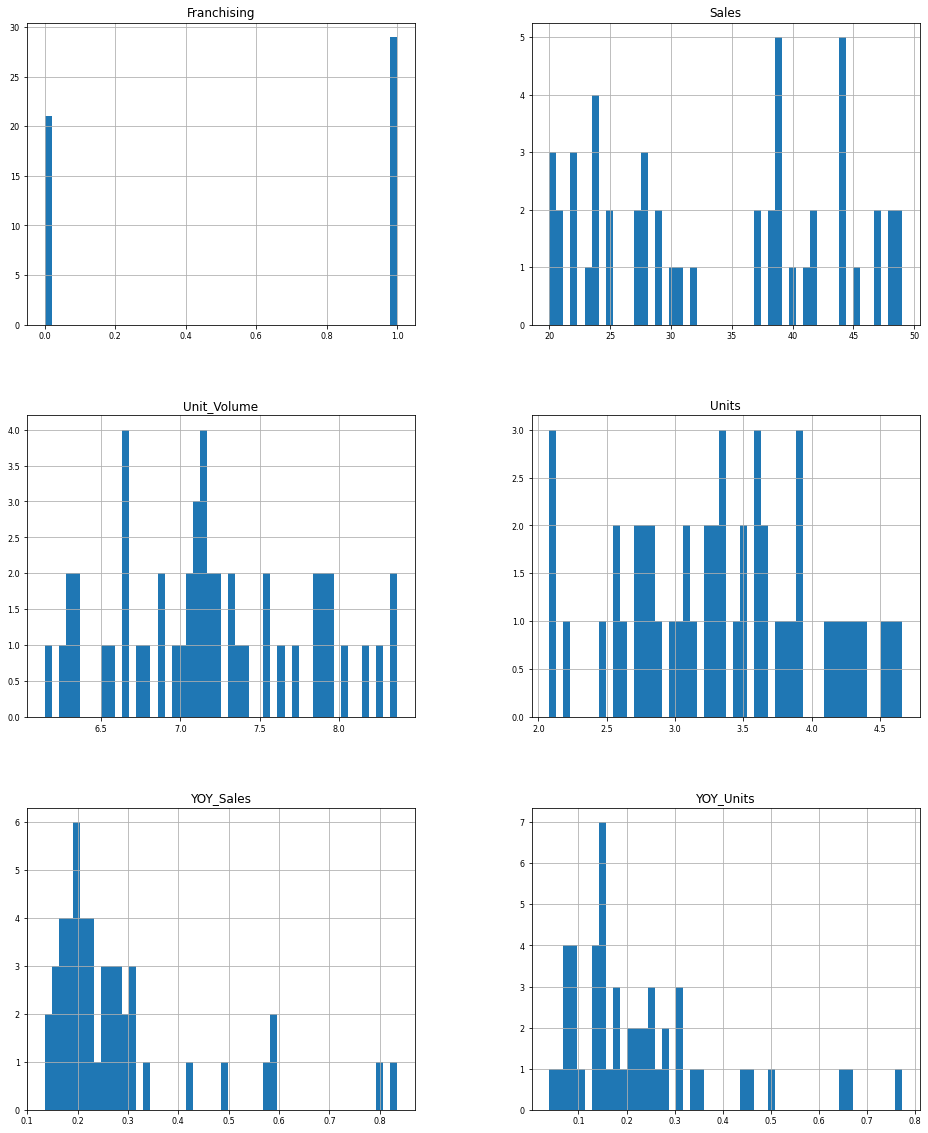

In [208]:
df_future_num.hist(figsize=(16, 20), 
              bins=50, xlabelsize=8, ylabelsize=8);

In [209]:
df_future_cat=pd.get_dummies(df_future_cat)

In [210]:
df_future_final=pd.concat((df_future_cat,df_future_num),axis=1)

In [211]:
x=df_future_final.drop('YOY_Sales',axis=1)

In [212]:
y = df_future_final[['YOY_Sales']]

In [214]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)

In [215]:
rf_model = RandomForestRegressor(verbose = 1)
rf_model.fit(x_train, y_train)
predict = rf_model.predict(x_test)

C:\Users\Welcome\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [216]:
mean_absolute_error(y_test, predict)

0.04412057487194414

In [217]:
data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)

xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10)

xgb_reg.fit(x_train,y_train)

predict_xgb = xgb_reg.predict(x_test)

In [219]:
mean_absolute_error(y_test, predict_xgb)

0.2826809663164396

In [220]:
df1 = pd.DataFrame(data=predict, columns=["Random_Forest"])
df2 = pd.DataFrame(data=predict_xgb, columns=["XGBoost"])

df = pd.concat([y_test.reset_index(drop = True), df1, df2], axis=1).sort_values(by = 'YOY_Sales', ascending = False).reset_index(drop = True)

for cols in list(df):
    df[cols] = np.exp(df[cols])

In [222]:
df

,YOY_Sales,Random_Forest,XGBoost
0,1.810,1.814325,1.648721
1,1.797,1.508711,1.648721
2,1.289,1.197375,1.648721
3,1.280,1.215180,1.648721
4,1.243,1.235755,1.648721
5,1.237,1.280851,1.648721
6,1.227,1.321172,1.648721
7,1.224,1.278543,1.648721
8,1.213,1.213827,1.648721
9,1.212,1.254846,1.648721
